In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import json

In [2]:
#Import restaurants dataset
with open('yelp_lv_food.json','r') as json_data:
    data = json_data.read()
data
restaurants = json.loads(data)  
restaurants

[{'name': 'CakesbyToi',
  'address': '3940 Martin Luther King Blvd, Ste 101',
  'city': 'Las Vegas',
  'state': 'NV',
  'latitude': 36.1922841,
  'longitude': -115.1592718,
  'stars': 1.5,
  'categories': 'American (Traditional), Food, Bakeries, Restaurants',
  'whether_Food': 1},
 {'name': 'Subway',
  'address': '2255 N Rampart Blvd',
  'city': 'Las Vegas',
  'state': 'NV',
  'latitude': 36.2017936,
  'longitude': -115.2819809,
  'stars': 2.5,
  'categories': 'Fast Food, Restaurants, Sandwiches',
  'whether_Food': 1},
 {'name': 'Omelet House Summerlin',
  'address': '2227 N Rampart Blvd',
  'city': 'Las Vegas',
  'state': 'NV',
  'latitude': 36.2019904392,
  'longitude': -115.283122245,
  'stars': 4.0,
  'categories': 'Beer, Wine & Spirits, Italian, Food, American (Traditional), Breakfast & Brunch, Restaurants',
  'whether_Food': 1},
 {'name': 'Baja Fresh Mexican Grill',
  'address': '7930 W Tropical Pkwy',
  'city': 'Las Vegas',
  'state': 'NV',
  'latitude': 36.271169,
  'longitude'

In [3]:
for restaurant in restaurants:
    if restaurant['longitude'] == None:
        print(restaurant['name'])

In [4]:
#Get the location of restaurants in New York
import numpy as np
restaurants_locations = list()
for i in range(len(restaurants)):
    latitude = restaurants[i]['latitude']
    longitude = restaurants[i]['longitude']
    if (latitude!=None) and (longitude!=None):
        restaurants_locations.append([latitude,longitude])
    else:
        del restaurants[i]
restaurants_locations = np.array(restaurants_locations)
restaurants_locations

IndexError: list index out of range

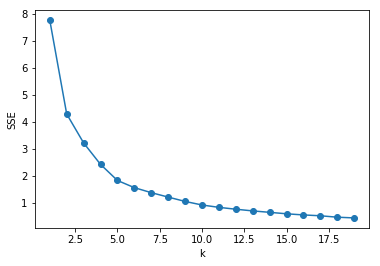

In [7]:
def cluster_k(restaurants_locations):
    SSE = []  # The MSE of each
    for k in range(1,20):
        estimator = KMeans(n_clusters=k)  # 构造聚类器
        estimator.fit(restaurants_locations)
        SSE.append(estimator.inertia_)
    X = range(1,20)
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.plot(X,SSE,'o-')
    plt.show()
cluster_k(restaurants_locations)

In [12]:
def cluster(restaurants, restaurants_locations, k):
    #Fit kmeans model for all the restaurants in New York
    kmeans = KMeans(n_clusters=k, random_state=0).fit(restaurants_locations)
    labels = kmeans.labels_
    
    #Show the restaurant belongs to which cluster
    i = 0
    for restaurant in restaurants:
        restaurant['label'] = int(labels[i])
        i = i + 1
    
    #Create a empty output list
    clusters = list()
    for i in range(k):
        cluster = list()
        clusters.append(cluster)
        
    #Add restaurant information to the empty output list
    for restaurant in restaurants:
        label = restaurant['label']
        clusters[label].append(restaurant)
    
    return clusters

output = cluster(restaurants,restaurants_locations,5)

In [13]:
type(output[0][1]['label'])

int

In [14]:

with open('clusters.json', 'w') as f:
    json.dump(output, f)